## 테이블의 내용은 아래의 내용을 담고 있습니다.
1. 고객이 각 귀속년도별
1. 근로 / 사업 / 기타 소득에 대한 예상환급액과 수수료를 조회한 뒤
1. 결제를 하거나 하지 않은 여부를 저장

## 컬럼 정보는 다음과 같습니다.
- age: 고객의 만 나이입니다. 
- gender: 고객의 성별입니다.
- year: 소득이 발생한 연도(귀속년도)입니다.
- refund: 예상환급액입니다.
- fee: 수수료입니다.
- has_paid: 수수료를 결제했는지의 여부
- income_근로: 고객의 근로소득(월급/일용직급여)
- income_사업: 고객의 사업소득(프리랜서 소득)
- income_기타: 고객의 기타소득(그외 기타 소득)

## 아래의 질문에 나름의 방식으로 답을 찾아주세요.
(정답은 없습니다. 문제를 정의하고, 해답에 이르게 된 과정과 그 해석을 잘 설득/설명해 주시는 것이 중요합니다.)

- 고객의 결제여부에 영향을 미치는 요인들은 무엇인가요? 
- 고객의 수수료 결제금액의 합을 높히기 위해서는 어떻게 해야 할까요?

#### 설정, import 

In [2]:
import pandas as pd

In [55]:

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

import platform

if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')
else:
    print('Unknown system... sorry~~')

import seaborn as sns

In [4]:
df = pd.read_csv("data/Jobis_3o3.csv")

#### 기본정보 

In [5]:
df.head()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN


In [6]:
df.info()
#기타소득이 가장 많고, 그 다음으로 근로소득, 사업소득 순 
#소득이 Nan인 것은 결국 0이라는 거니까, 소득의 결측값은 0으로 처리해도 무방함 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        100000 non-null  float64
 1   gender     100000 non-null  object 
 2   year       100000 non-null  int64  
 3   refund     100000 non-null  float64
 4   fee        100000 non-null  float64
 5   has_paid   100000 non-null  bool   
 6   income_근로  40791 non-null   float64
 7   income_사업  78227 non-null   float64
 8   income_기타  25260 non-null   float64
dtypes: bool(1), float64(6), int64(1), object(1)
memory usage: 6.2+ MB


In [7]:
df.describe()

,age,year,refund,fee,income_근로,income_사업,income_기타
count,100000.00000,100000.000000,1.000000e+05,100000.000000,4.079100e+04,7.822700e+04,2.526000e+04
mean,29.00096,2018.111300,2.081422e+05,7247.641000,6.432597e+06,1.511712e+06,6.362834e+05
std,7.76819,1.495812,3.071744e+05,11926.896979,6.583716e+06,2.449810e+06,1.484947e+06
min,15.00000,2015.000000,-8.265000e+06,400.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,24.00000,2017.000000,3.300000e+04,400.000000,1.616000e+06,1.770000e+05,8.200000e+04
50%,27.00000,2018.000000,9.900000e+04,4300.000000,4.507000e+06,6.190000e+05,2.130000e+05
75%,31.00000,2019.000000,2.540000e+05,8500.000000,9.301000e+06,1.601000e+06,5.820000e+05
max,81.00000,2020.000000,7.725000e+06,307000.000000,1.823350e+08,3.993400e+07,6.281000e+07


In [8]:
df.columns

Index(['age', 'gender', 'year', 'refund', 'fee', 'has_paid', 'income_근로',
       'income_사업', 'income_기타'],
      dtype='object')

<AxesSubplot:>

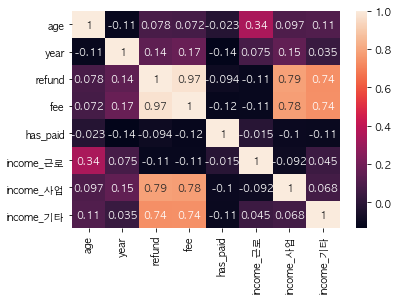

In [9]:
sns.heatmap(df[['age', 'gender', 'year', 'refund', 'fee', 'has_paid', 'income_근로',
       'income_사업', 'income_기타']].corr(), 
           annot=True)

In [10]:
#환급액에 비례해서 수수료를 지불하기 때문에 수수료 - 환급액의 양의 상관관계가 강하다 
#연령과 근로소득에는 상관관계 존재. 연차 때문이겠고 
#환급액, 수수료와 상관관계를 강하게 보이는 유형은 income 중에서도 사업 및 기타소득 -> 근로소득은 연말정산으로 하니까?

In [21]:
df["income_근로"].fillna(0.0, inplace=True)
df["income_사업"].fillna(0.0, inplace=True)
df["income_기타"].fillna(0.0, inplace=True)

In [22]:
df.head()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,0.0
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,0.0,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,0.0,1461000.0,0.0
3,27.0,M,2019,410000.0,16200.0,False,0.0,2471000.0,0.0
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,0.0


In [23]:
#랜덤 포레스트 classifier 고고 

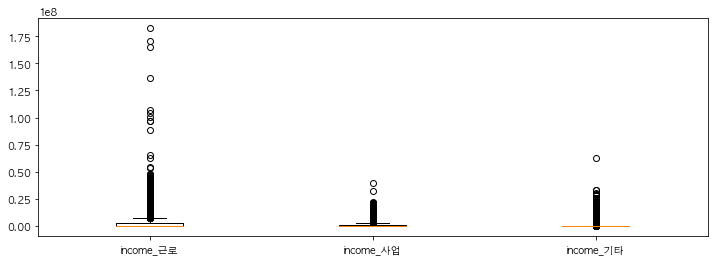

In [24]:
plt.figure(figsize=(12,4))
plt.boxplot(x=df[["income_근로", "income_사업", "income_기타"]], labels = ["income_근로", "income_사업", "income_기타"])
plt.show()

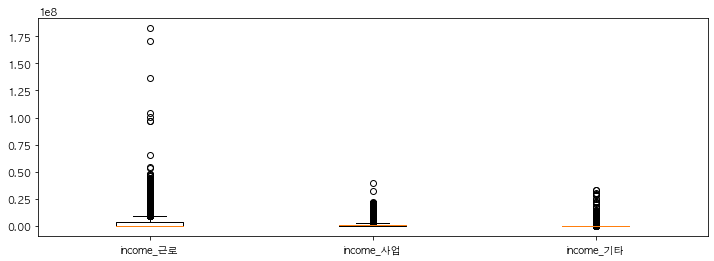

In [25]:
plt.figure(figsize=(12,4))
plt.boxplot(x=df[df["has_paid"]==True][["income_근로", "income_사업", "income_기타"]], labels = ["income_근로", "income_사업", "income_기타"])
plt.show()

/Users/jh/miniforge3/envs/m1/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jh/miniforge3/envs/m1/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jh/miniforge3/envs/m1/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/jh/miniforge3/envs/m1/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0, flags=flags)


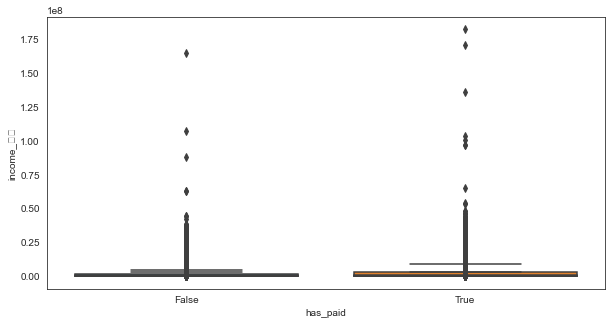

In [52]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = "has_paid", y ="income_근로", data = df)

plt.show()

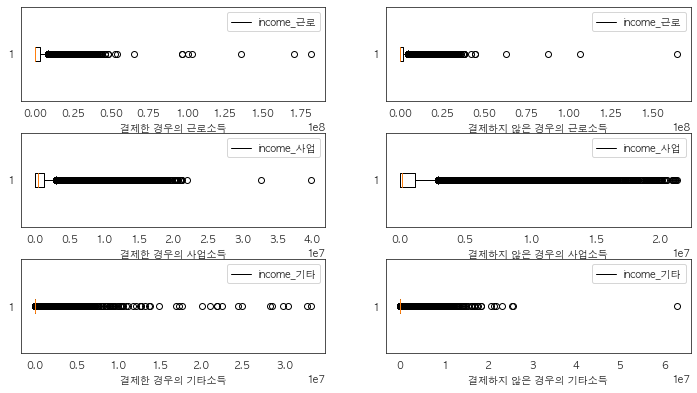

In [57]:
sns.set_style("white")
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'

plt.figure(figsize=(12,6))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)

ax1 = plt.subplot(321)
ax1.boxplot(df[df["has_paid"] == True]["income_근로"], vert=False)
ax1.legend(["income_근로"])
plt.xlabel("결제한 경우의 근로소득")

ax2 = plt.subplot(322)
ax2.boxplot(df[df["has_paid"] == False]["income_근로"], vert=False)
ax2.legend(["income_근로"])
plt.xlabel("결제하지 않은 경우의 근로소득")

ax3 = plt.subplot(323)
ax3.boxplot(df[df["has_paid"] == True]["income_사업"], vert=False)
ax3.legend(["income_사업"])
plt.xlabel("결제한 경우의 사업소득")

ax4 = plt.subplot(324)
ax4.boxplot(df[df["has_paid"] == False]["income_사업"], vert=False)
ax4.legend(["income_사업"])
plt.xlabel("결제하지 않은 경우의 사업소득")

ax5 = plt.subplot(325)
ax5.boxplot(df[df["has_paid"] == True]["income_기타"], vert=False)
ax5.legend(["income_기타"])
plt.xlabel("결제한 경우의 기타소득")

ax6 = plt.subplot(326)
ax6.boxplot(df[df["has_paid"] == False]["income_기타"], vert=False)
ax6.legend(["income_기타"])
plt.xlabel("결제하지 않은 경우의 기타소득")

plt.show()

In [59]:
#refund, fee도 드랍해야됨 특성에서 
df.columns
# feature -> 'age', 'gender', 'year', 'refund', 'fee', 'has_paid', 'income_근로',
#       'income_사업', 'income_기타'
# label -> has_paid

Index(['age', 'gender', 'year', 'refund', 'fee', 'has_paid', 'income_근로',
       'income_사업', 'income_기타'],
      dtype='object')

In [60]:
X = df.drop(["refund", "fee", "has_paid"], axis=1)
y = df["has_paid"]

In [64]:
y = [0.0 if x==False else 1.0 for x in y ]

In [66]:
y[:5]

[0.0, 1.0, 0.0, 0.0, 1.0]

In [72]:
#성별 데이터타입 변경 (여자 1, 남자 0)
X["gender"] = X["gender"].apply(lambda x: 1 if x=="F" else 0)

In [73]:
X["gender"].mean() #성비는 거의 비슷~

0.49501

In [61]:
df.shape

(100000, 9)

In [75]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.3, 
                                                   random_state=13)


In [78]:
from sklearn.tree import DecisionTreeClassifier

df_tree = DecisionTreeClassifier(max_depth=3, random_state=13)
df_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=13)

In [79]:
from sklearn.metrics import accuracy_score

y_pred_tr = df_tree.predict(X_train)
y_pred_test = df_tree.predict(X_test)

print("Train Acc : ", accuracy_score(y_train, y_pred_tr))

print("Test Acc : ", accuracy_score(y_test, y_pred_test))

#결정나무는 약 70퍼의 정확도...

Train Acc :  0.7240428571428571
Test Acc :  0.7212


In [81]:
## income 정규화 

X["income_근로"] = (X["income_근로"] - X["income_근로"].mean())/X["income_근로"].std()
X["income_기타"] = (X["income_기타"] - X["income_기타"].mean())/X["income_근로"].std()

X["income_사업"] = (X["income_사업"] - X["income_사업"].mean())/X["income_근로"].std()

In [83]:

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.3, 
                                                   random_state=13)



In [84]:
df_tree = DecisionTreeClassifier(max_depth=3, random_state=13)
df_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=13)

In [85]:
#정규화를 했다고 해서 accuracy가 크게 상승하지는 않는다 
y_pred_tr = df_tree.predict(X_train)
y_pred_test = df_tree.predict(X_test)

print("Train Acc : ", accuracy_score(y_train, y_pred_tr))

print("Test Acc : ", accuracy_score(y_test, y_pred_test))

Train Acc :  0.7240428571428571
Test Acc :  0.7212


In [91]:
#다시 시도하고 그래프 그려보기 
X = df.drop(["refund", "fee", "has_paid"], axis=1)
y = df["has_paid"]

y = [0.0 if x==False else 1.0 for x in y ]
X["gender"] = X["gender"].apply(lambda x: 1 if x=="F" else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.3, 
                                                   random_state=13)

df_tree = DecisionTreeClassifier(max_depth=3, random_state=13)
df_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=13)

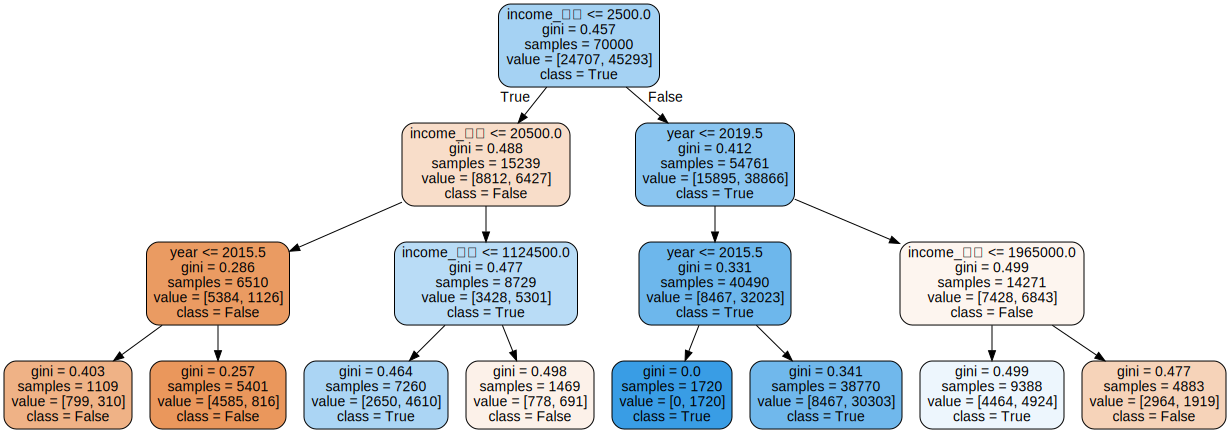

In [92]:
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(df_tree, feature_names=X_train.columns, 
                      class_names=["False", "True"], 
                      rounded=True, filled=True))



In [93]:
#중요 특성 보기 

dict(zip(X_train.columns, df_tree.feature_importances_))

{'age': 0.0,
 'gender': 0.0,
 'year': 0.3854265228361309,
 'income_근로': 0.0,
 'income_사업': 0.36039717592294124,
 'income_기타': 0.2541763012409278}